In [1]:
using Pkg
Pkg.activate("SchrodingerEquationSolver")
include("SchrodingerEquationSolver.jl")

  Activating project at `~/Desktop/physics_coding_projects/julia/SchrodingerEquationSolver/src/SchrodingerEquationSolver`


Main.SchrodingerEquationSolver

In [2]:
import .SchrodingerEquationSolver as ses
import .ses.Grids as Grids
import .ses.Potentials as Potentials
import .ses.MathUtils as MathUtils
import .ses.Hydrogen as Hydrogen
import .ses.InitialConditions as InitialConditions
import .ses.OneDSchrodingerEquationSolver as odses
import .ses.EigenvalueFinders as EigenvalueFinders
import .ses.AtomBasisSet as AtomBasisSet

In [3]:
using Plots

In [4]:
#r_min::Float64=0.0;
#r_max::Float64=50.0;
r_max::Float64=8.0;
Z::Int64=6;
#l::Int64=0;


6

In [5]:
#grid= Grids.uniform_grid(r_min, r_max, N);
grid= ses.Grids.exponential_grid(r_max, Z);
N::Int64=sizeof(grid)[1];


In [6]:
basis= AtomBasisSet.init_atom_basis_set(Z, grid);

In [7]:
basis

Main.SchrodingerEquationSolver.AtomBasisSet.atom_basis_set([1.6684813524352944e-9, 3.340811317806179e-9, 5.016998773539894e-9, 6.697052617540299e-9, 8.380981768236536e-9, 1.0068795164628647e-8, 1.1760501766336231e-8, 1.345611055364584e-8, 1.515563052755818e-8, 1.6859070709836316e-8  …  7.8642897630543676, 7.882429977837803, 7.900612035860974, 7.918836033641879, 7.93710206792115, 7.955410235662482, 7.973760634053316, 7.992153360505272, 8.010588512654582, 8.029066188362773], Main.SchrodingerEquationSolver.AtomBasisSet.orbital[Main.SchrodingerEquationSolver.AtomBasisSet.orbital(1, 0, "1s", -18.0, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]), Main.SchrodingerEquationSolver.AtomBasisSet.orbital(2, 0, "2s", -4.5, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]), Main.SchrodingerEquationSolver.AtomBasisSet.orbital(2, 1, "2p", -4.5, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

In [8]:
v_colu= Potentials.coulomb_potential(Z, grid);
for i_orbi in basis.orbitals
    v_angu= Potentials.angular_potential(i_orbi.l, grid);
    v_effe= v_colu + v_angu;

    E_grid= Grids.uniform_grid(i_orbi.E - 0.1*i_orbi.E, i_orbi.E + 0.05*i_orbi.E, 20);

    E_intervals, bad_intervals= EigenvalueFinders.find_eigenvalue_intervals(E_grid, v_effe,
                                                    grid,InitialConditions.atom, i_orbi.l);
    u_temp, ei_temp= EigenvalueFinders.illinois_eigenvalue_finder(E_intervals[1], v_effe, grid,InitialConditions.atom);
    println(i_orbi.name)
    println("pred E", ei_temp)
    println("targ E", i_orbi.E)
    println("*****************")
    i_orbi.E=ei_temp
    i_orbi.u=u_temp

end

1s
pred E-18.000015925586254
targ E-18.0
*****************


2s
pred E-4.500003981151987
targ E-4.5
*****************
2p
pred E-4.500001327397026
targ E-4.5
*****************


In [9]:
u_orbitals=[i_orbi.u for i_orbi in basis.orbitals];

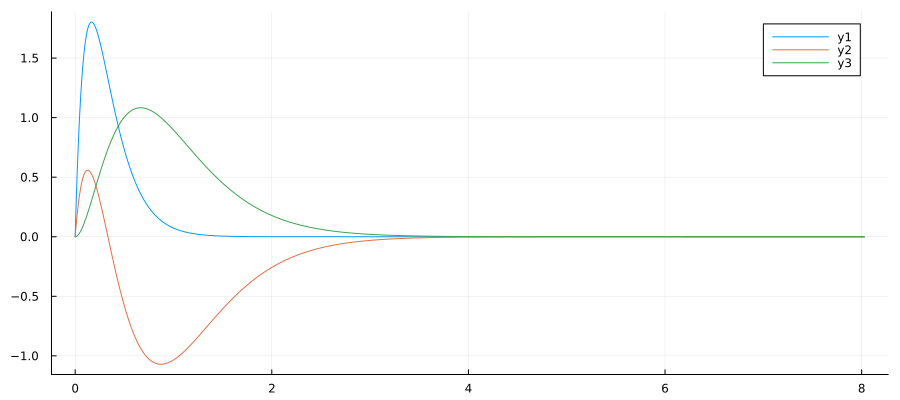

In [10]:
plot!(grid, u_orbitals)
plot!(size=(900,400))

In [9]:
basis.orbitals[5].E

-10.88888888888889

In [6]:


v_colu= Potentials.coulomb_potential(Z, grid);
v_angu= Potentials.angular_potential(l, grid);
v_effe= v_colu + v_angu;

In [7]:
#MAKE SURE THAT 
minimum(v_effe)

-1.957868250609263e10

In [8]:

E_max::Float64=-5.0;
E_min::Float64=-98.2;
E_N::Int64=10;
E_grid= Grids.uniform_grid(E_min, E_max, E_N);

In [9]:
E_intervals, bad_intervals= EigenvalueFinders.find_eigenvalue_intervals(E_grid, v_effe, grid,InitialConditions.atom, l);
E_intervals

4-element Vector{Tuple{Float64, Float64}}:
 (-98.01341341341342, -97.92012012012012)
 (-24.591591591591595, -24.49829829829831)
 (-10.97077077077077, -10.877477477477484)
 (-6.212812812812814, -6.119519519519528)

In [10]:
bad_intervals

Tuple{Float64, Float64}[]

In [11]:
numb_solu::Int64= size(E_intervals)[1];
eigen_list::Vector{Float64}=zeros(numb_solu);
u_wave_functions::Vector{Vector{Float64}}= [zeros(N) for _ in 1:numb_solu];

In [12]:
for (i, ei_interval) in enumerate(E_intervals)
    u_temp, ei_temp= EigenvalueFinders.illinois_eigenvalue_finder(ei_interval, v_effe, grid,InitialConditions.atom);
    u_wave_functions[i]=u_temp;
    eigen_list[i]= ei_temp;
end

In [13]:
eigen_list

4-element Vector{Float64}:
 -98.00008670519217
 -24.500021676408746
 -10.888898522371766
  -6.125005419176161

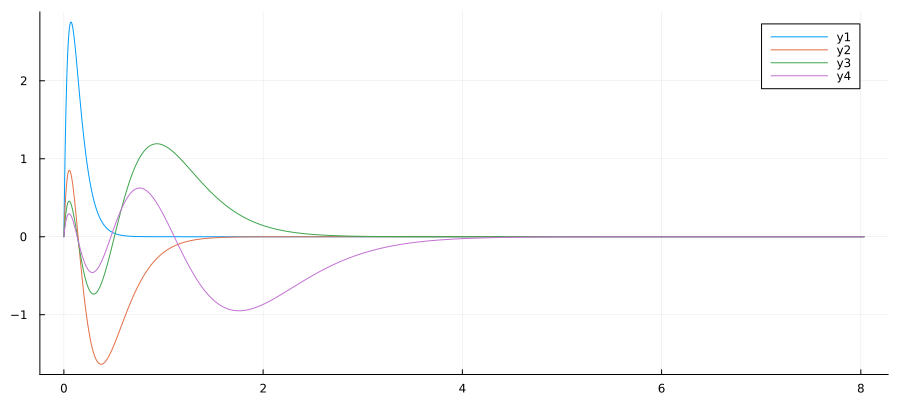

In [14]:
plot!(grid, u_wave_functions)
plot!(size=(900,400))

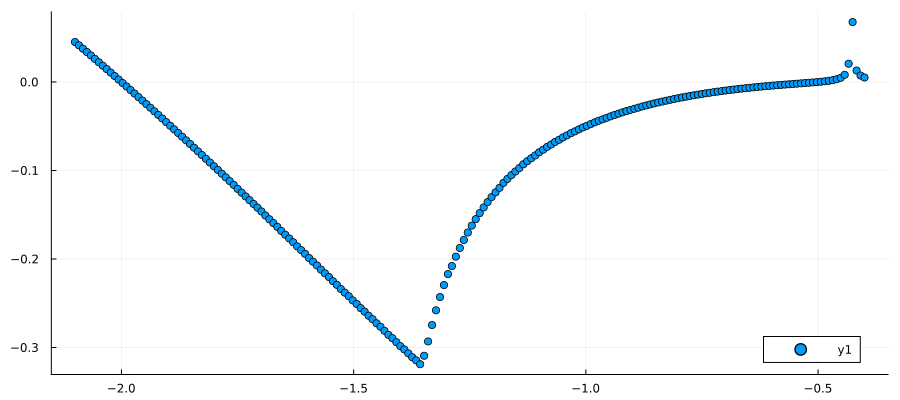

In [10]:
merg_valu_of_E=zeros(Float64, E_N);
for (i, ei) in enumerate(E_grid)
    init_valu1_fwrd, init_valu2_fwrd,
    init_valu1_bwrd, init_valu2_bwrd =InitialConditions.atom(grid, ei, l);
    u_merged, merge_value= odses.solver(ei,init_valu1_fwrd,init_valu2_fwrd, init_valu1_bwrd,
    init_valu2_bwrd, v_effe, grid);
    merg_valu_of_E[i]=merge_value;
end
scatter(E_grid, [merg_valu_of_E])
plot!(size=(900,400))

In [11]:
ener_indx= MathUtils.indices_of_zeros_finder(merg_valu_of_E);

In [12]:
ener_indx[1]

12

In [13]:
abs(merg_valu_of_E[ener_indx[1]+1]-merg_valu_of_E[ener_indx[1]])

0.003935974353017263

In [19]:
0.51*(abs(merg_valu_of_E[ener_indx[1]+1]-merg_valu_of_E[ener_indx[1]+2]) + abs(merg_valu_of_E[ener_indx[1]]-merg_valu_of_E[ener_indx[1]-1]))

0.004014564713293049

In [15]:
abs(merg_valu_of_E[ener_indx[1]]-merg_valu_of_E[ener_indx[1]-1])

0.003919938650547045